In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

In [34]:
hdiab = pd.read_csv('Data/health care diabetes.csv')
hdiab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Missing values Treatment

In [35]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
hdiab[columns] = hdiab[columns].applymap(lambda x: np.NaN if x==0 else x)
hdiab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [36]:
hdiab = hdiab.fillna(hdiab.mean())
hdiab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<span style="color: yellow;">__*Insights*__</span> <br>
Since all columns which contains NaN are continuous, so we imputed the missing values with their mean values

#### Skewness Treatment (Data Distribution)

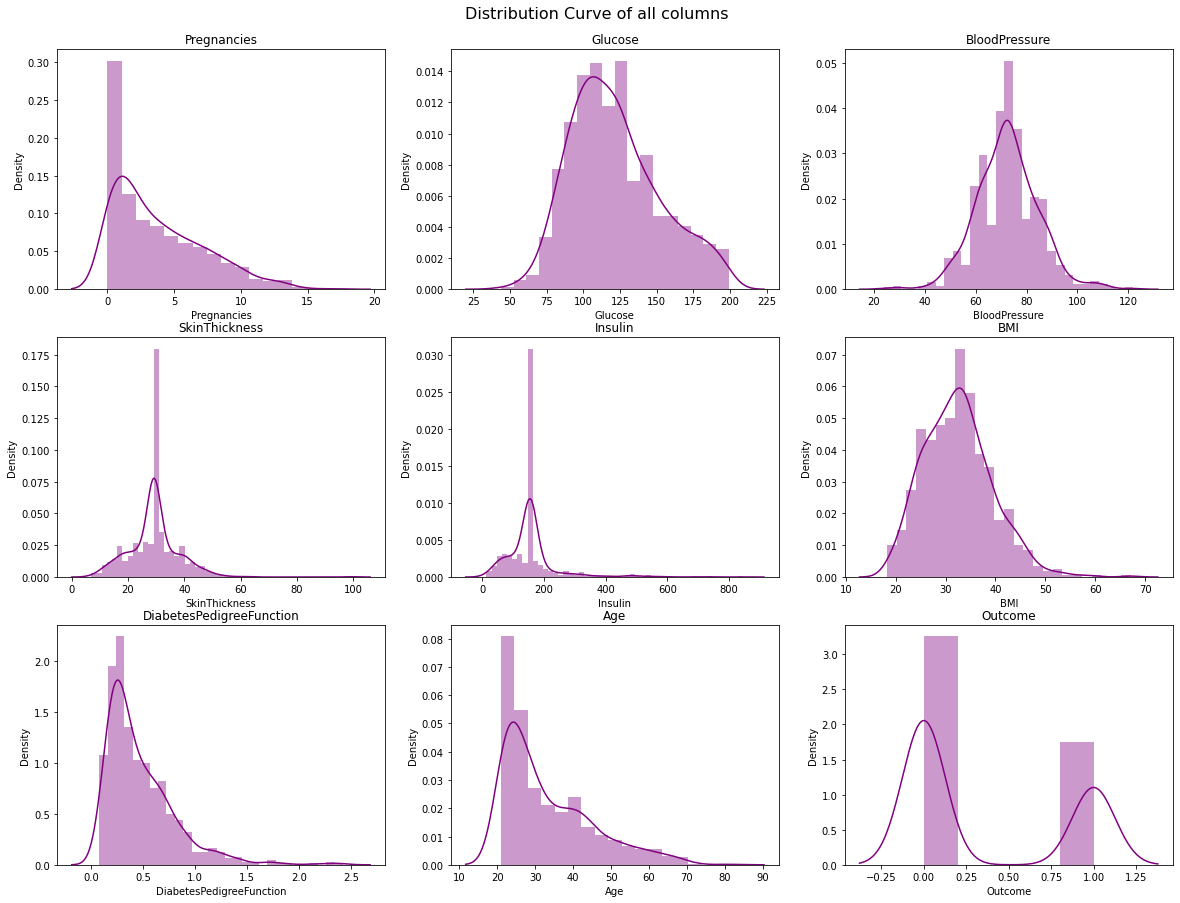

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution Curve of all columns', fontsize=16, y=0.92)
col = 0
column = hdiab.columns
for i in range(3):
    for j in range(3):
        sns.distplot(hdiab[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

<span style="color: yellow;">__*Insights*__</span> <br>
We are going to treat all columns for skewness except `Glucose`, `BloodPressure` and `Outcome`. There are several ways for treating skewness in a dataset such as 
* Power Transformation
* Square root Transformation
* Log Transformation
* Box-Cox Transformation
* Exponential Transformation

For this example we will stick with Power transformation

In [38]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(standardize=True)

col = ['Pregnancies', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
hdiab[col] = power.fit_transform(hdiab[col])

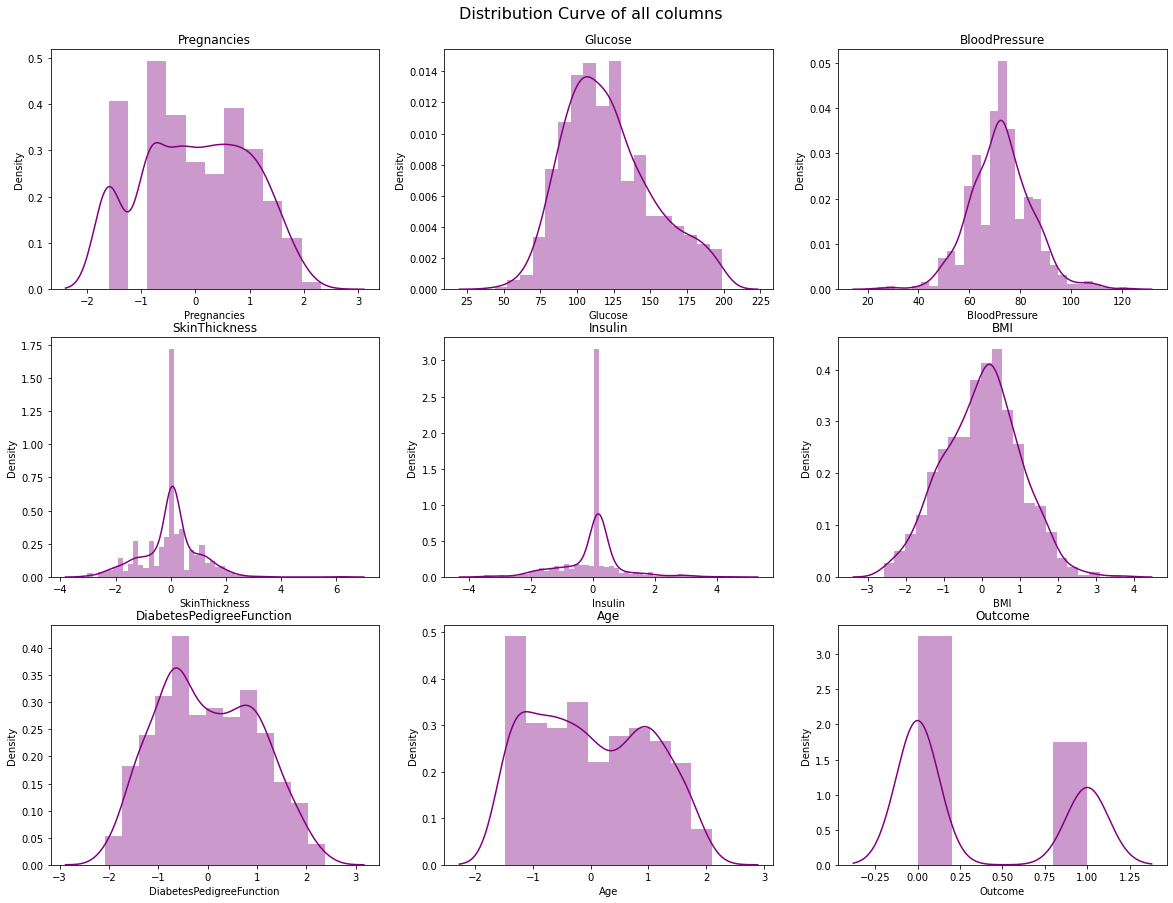

In [39]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution Curve of all columns', fontsize=16, y=0.92)
col = 0
column = hdiab.columns
for i in range(3):
    for j in range(3):
        sns.distplot(hdiab[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

#### Saving data

In [40]:
hdiab.to_csv('Data/Preprocessed.csv', index=False)